#Hand on Implementation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Load the iris dataset
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
'species']
iris = pd.read_csv(url, header=None, names=column_names)
# Display the first few rows of the dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

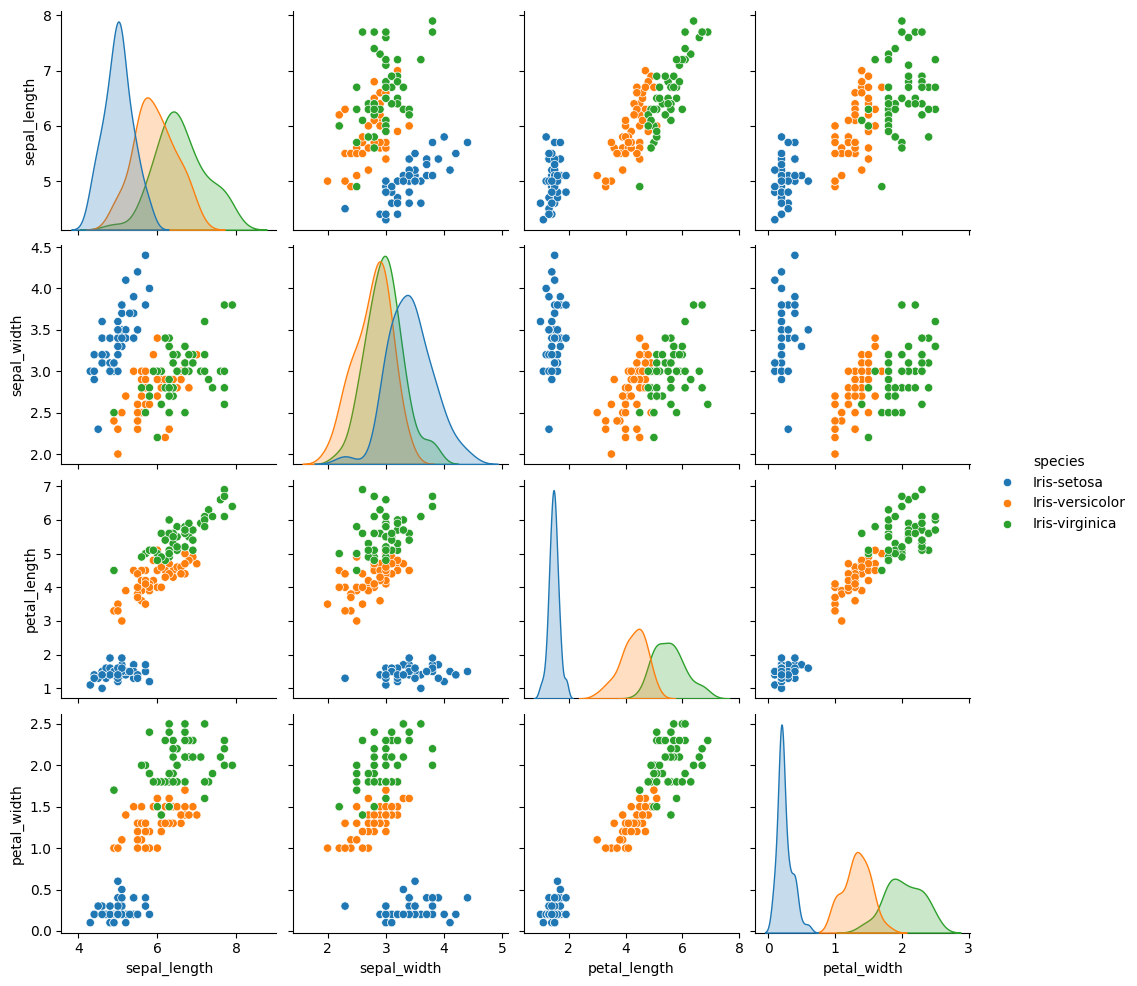

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
# Visualize the distribution of each feature
sns.pairplot(iris, hue='species')
plt.show()
# Check for missing values
print(iris.isnull().sum())

In [ ]:
# Binarize the target variable
iris['target'] = np.where(iris['species'] == 'Iris-virginica', 1, 0)
# Drop the original species column
iris = iris.drop(columns=['species'])
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [ ]:
# Split the data into features and target
X = iris.drop(columns=['target'])
y = iris['target']
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (120, 4)
Testing set shape: (30, 4)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaled training data:")
print(X_train_scaled[:5])

Scaled training data:
[[-1.47393679  1.22037928 -1.5639872  -1.30948358]
 [-0.13307079  3.02001693 -1.27728011 -1.04292204]
 [ 1.08589829  0.09560575  0.38562104  0.28988568]
 [-1.23014297  0.77046987 -1.21993869 -1.30948358]
 [-1.7177306   0.32056046 -1.39196294 -1.30948358]]


In [ ]:
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
model = LogisticRegression()
# Train the model
model.fit(X_train_scaled, y_train)
# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[ 0.17705268 -0.65559404  2.32182293  2.85727663]]
Intercept: [-3.70951767]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[19  0]
 [ 0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



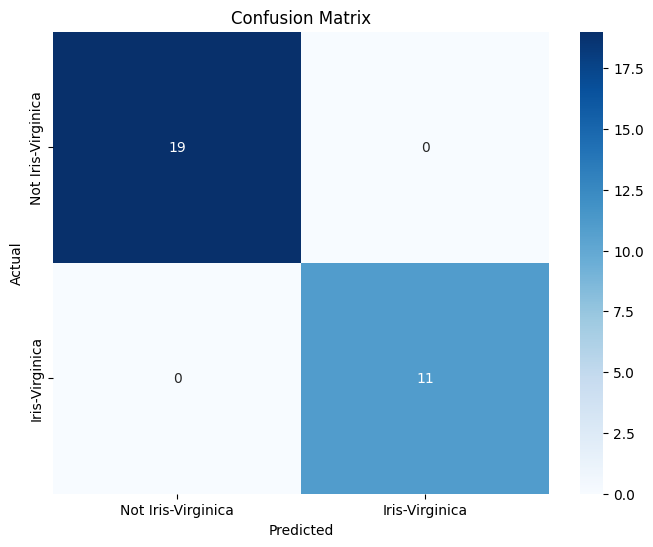

In [ ]:
import seaborn as sns
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
 xticklabels=['Not Iris-Virginica', 'Iris-Virginica'],
 yticklabels=['Not Iris-Virginica', 'Iris-Virginica'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#*MiniChallenge*

#Summary

The dataset used will be the Banknote Authentication Dataset, and the entire process will begin with data preprocessing. First, the raw data will be loaded into a Pandas DataFrame, where meaningful column headers such as variance, skewness, curtosis, entropy, and class will be assigned. The data will be checked for missing values to ensure that the dataset is clean and ready for analysis. The code will include several visualizations to gain a deeper understanding of the data. Histograms will be plotted for each feature to observe their distribution, boxplots will be generated to detect potential outliers, and a heatmap of the correlation matrix will be created to show relationships between the features.

After the initial data exploration, the dataset will be split into features (X) and the target variable (y). The data will then be divided into training and testing sets, with 80% of the data used for training the model and 20% reserved for testing its performance. Since Logistic Regression models are sensitive to the scale of the data, the features will be standardized using StandardScaler. This step will ensure that the mean is removed and the data is scaled to unit variance, improving the performance and stability of the model. Both the training and testing sets will be scaled to maintain consistency throughout the process.

Once the data is prepared, a Logistic Regression model will be initialized and trained on the scaled training data. The model’s coefficients and intercept will be printed, providing insights into how each feature contributes to the classification task. The model will then be evaluated by making predictions on the test set and calculating the accuracy. Additionally, a confusion matrix will be generated to assess the number of true positives, true negatives, false positives, and false negatives. A classification report will also be produced, providing a detailed breakdown of the model’s precision, recall, F1-score, and support for each class. To visualize the confusion matrix, a heatmap will be generated using Seaborn, making the performance evaluation easier to interpret.

Further evaluation of the model will be conducted using a Receiver Operating Characteristic (ROC) curve. The ROC curve and its associated AUC (Area Under the Curve) score will be calculated to measure the model's ability to distinguish between the positive and negative classes. Additionally, the code will explore the use of L2 regularization to prevent overfitting. A second Logistic Regression model with L2 regularization will be trained, and its performance will be evaluated similarly by calculating accuracy, confusion matrix, and classification report.

To optimize the model, GridSearchCV will be employed for hyperparameter tuning. The grid search will explore different values for the regularization strength (C), penalty type (l1 or l2), and the maximum number of iterations. The best-performing hyperparameters will be selected based on cross-validation results, and the best model will be re-evaluated on the test set. The results will be displayed through another classification report and confusion matrix, visualized using a heatmap.

#• Load the dataset, preprocess it, and train a logistic regression model.


##Loading dataset

Loading the libraries

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,roc_curve, auc,confusion_matrix, roc_auc_score

Import the dataset and converting to csv file with respective header

In [87]:
# Load the data from the original file
read_file = pd.read_csv(r"/content/data_banknote_authentication.txt", header=None)

# Set the column headers based on the provided information
headers = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
read_file.columns = headers

# Save the updated file with proper headers
read_file.to_csv(r"/content/bankNote.csv", index=False)

# Display the first few rows to verify the changes
read_file.head()


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Loading the dataset to data

In [88]:
# Load the dataset
data = pd.read_csv('/content/bankNote.csv')
# Display the first few rows of the dataset
print(data)

      variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]


##PreProcessing and Feature Engineering

  Checking the null values in dataset

In [58]:
data.isnull().sum()

,0
variance,0
skewness,0
curtosis,0
entropy,0
class,0


Identifing the data types

In [59]:
data.dtypes

,0
variance,float64
skewness,float64
curtosis,float64
entropy,float64
class,int64


Histrograms of columns

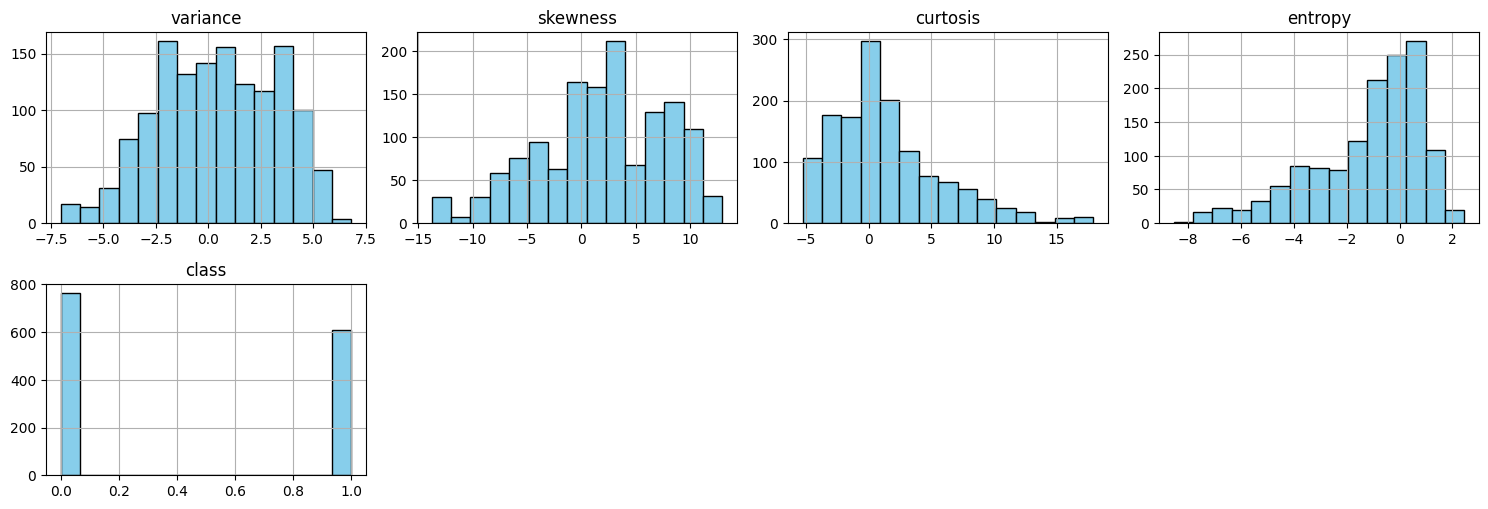

In [60]:
def plot_histograms(df):
    df.hist(bins=15, figsize=(15, 10), layout=(4, 4), color='skyblue', edgecolor='black')
    plt.tight_layout()
    plt.show()

# Display histograms
plot_histograms(data)

Creating Box Plots

<Figure size 1500x1000 with 0 Axes>

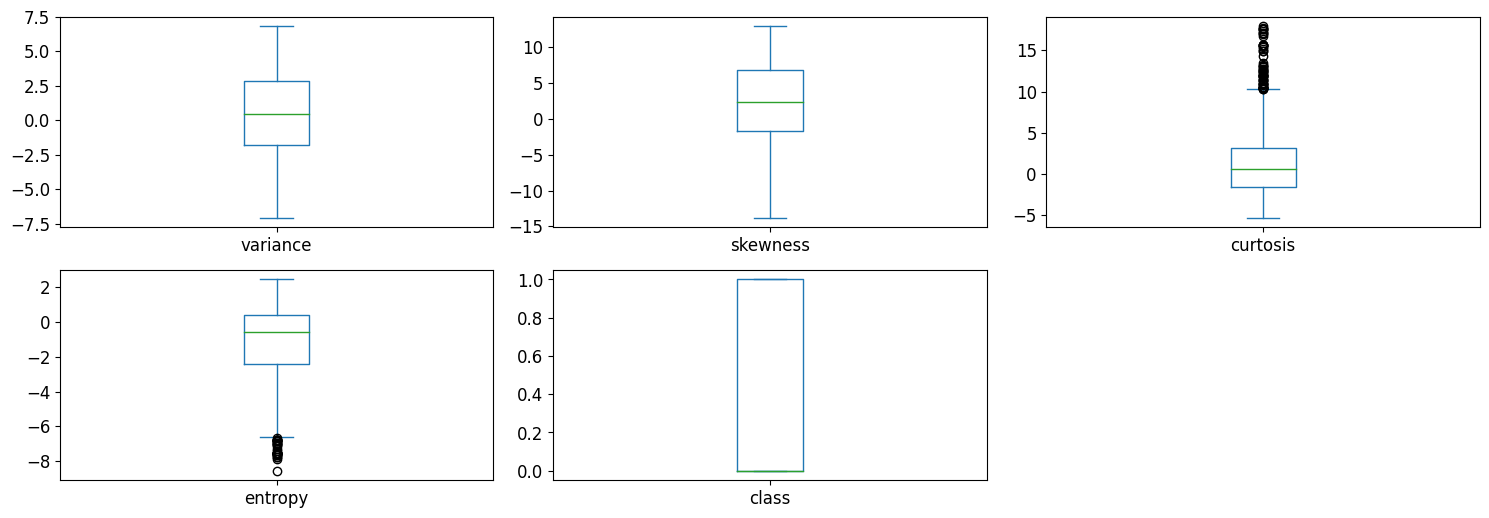

In [61]:
def plot_boxplots(df):
    plt.figure(figsize=(15, 10))
    df.plot(kind='box', subplots=True, layout=(4, 3), sharex=False, sharey=False, fontsize=12, figsize=(15, 10))
    plt.tight_layout()
    plt.show()

# Display boxplots
plot_boxplots(data)

Creating correlation matrix

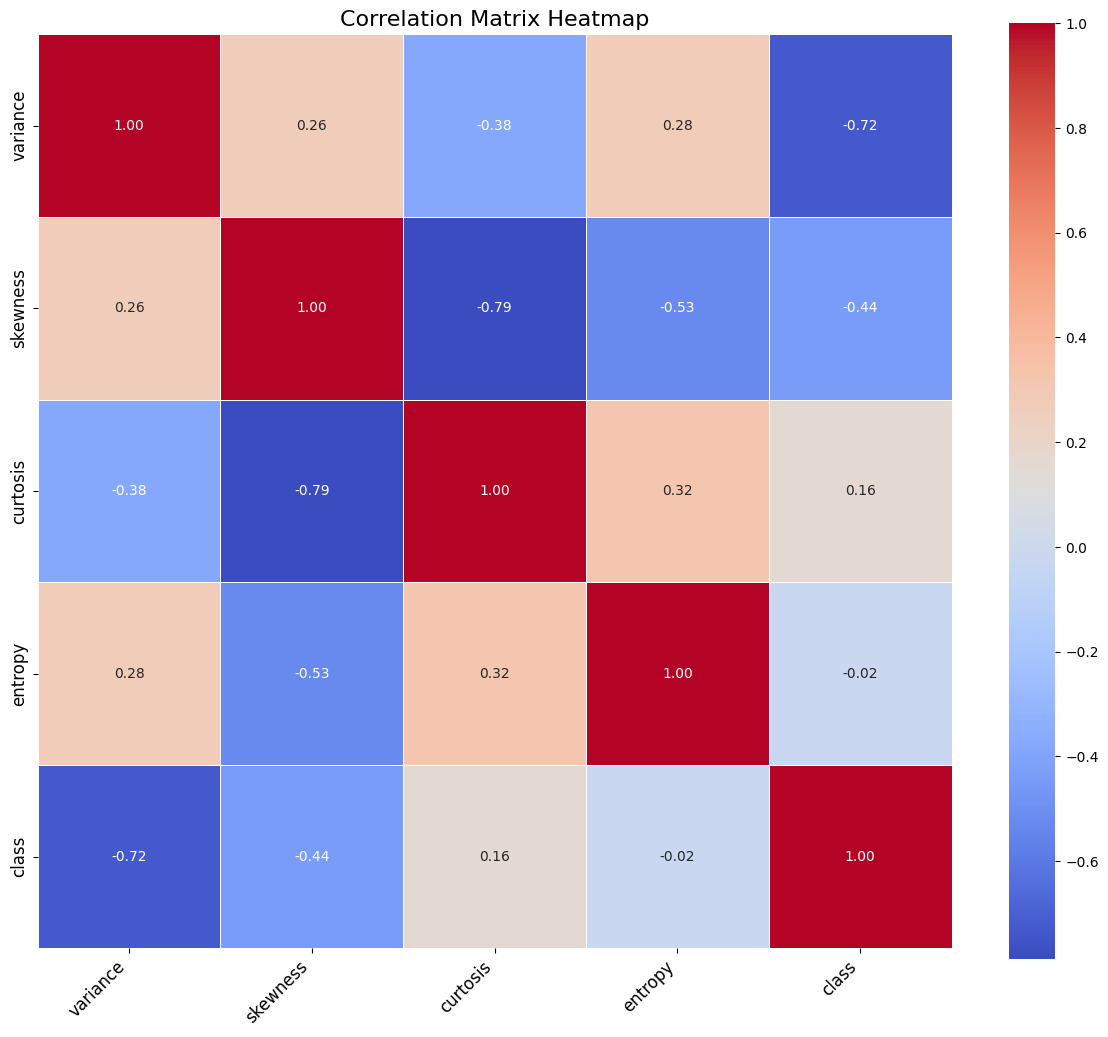

In [62]:
# Generate a correlation matrix
corr_matrix = data.corr()

# Set the figure size
plt.figure(figsize=(12, 12))

# Create a heatmap with improved aesthetics
sns.heatmap(
    corr_matrix,
    annot=True,                  # Show correlation coefficients
    cmap='coolwarm',            # Colormap
    fmt=".2f",                  # Format for annotation text
    linewidths=.6,              # Lines between cells
    linecolor='white',          # Line color
    cbar_kws={"shrink": .8},   # Shrink color bar
    square=True,                # Make cells square-shaped
)
# Title and labels
plt.title('Correlation Matrix Heatmap', size=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x labels
plt.yticks(fontsize=12)  # Y labels font size


# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


##Splitting and Training the dataset

Splitting the data to training and testing datasets

In [89]:
# Split the data into features and target
X = data.drop(columns=['class'])
y = data['class']
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1097, 4)
Testing set shape: (275, 4)


Scaling the data

In [90]:
# Perform feature engineering on the training data (e.g., scaling)
scaler = StandardScaler()  # Standardize features by removing the mean and scaling to unit variance
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler on the training data and transform it
X_test_scaled = scaler.transform(X_test)  # Use the same scaler to transform the test data

# Convert the scaled data back into DataFrame for readability (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display the first few rows of the scaled training data
print(X_train_scaled.head())

   variance  skewness  curtosis   entropy
0 -0.639156  1.805580 -0.188365 -3.050968
1  0.821889  0.852399 -0.594078  0.603455
2 -1.657033 -1.633283  2.383862 -0.342355
3  1.728861  0.328631 -0.748077  1.084449
4  0.113973  0.205992  0.325092  0.534656


Standardization of data

In [91]:
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaled training data:")
print(X_train_scaled[:5])

Scaled training data:
[[-0.6391558   1.80557961 -0.18836535 -3.05096841]
 [ 0.82188925  0.85239902 -0.59407847  0.60345479]
 [-1.65703344 -1.63328321  2.38386151 -0.34235536]
 [ 1.72886098  0.32863093 -0.74807722  1.08444894]
 [ 0.11397258  0.2059923   0.32509151  0.53465595]]


Training the model and finding Coefficients and Intercept

In [92]:
# Initialize the logistic regression model
model = LogisticRegression()
# Train the model
model.fit(X_train_scaled, y_train)
# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[-4.77298485 -4.66795507 -4.28037011  0.26519098]]
Intercept: [-1.50784633]


Finding the classification report , accuracy and confusion matrix

In [93]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9781818181818182
Confusion Matrix:
 [[144   4]
 [  2 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



 Visualize the confusion matrix

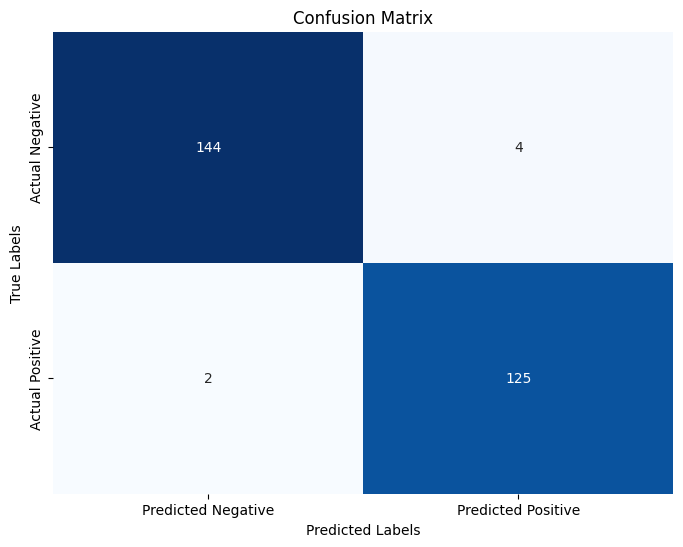

In [94]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#• Evaluate your model using the confusion matrix and ROC-AUC.

Finding the ROC-AUC curve

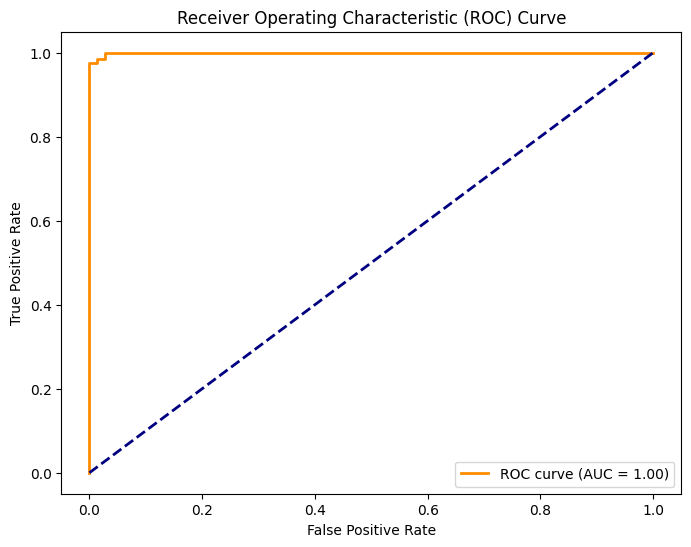

In [95]:
# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Finding the confusion matrix and finding the roc-auc value



In [96]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC-AUC
# Use the best model obtained from grid search
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", roc_auc)


Confusion Matrix:
[[144   4]
 [  2 125]]
ROC-AUC: 0.99968078314535


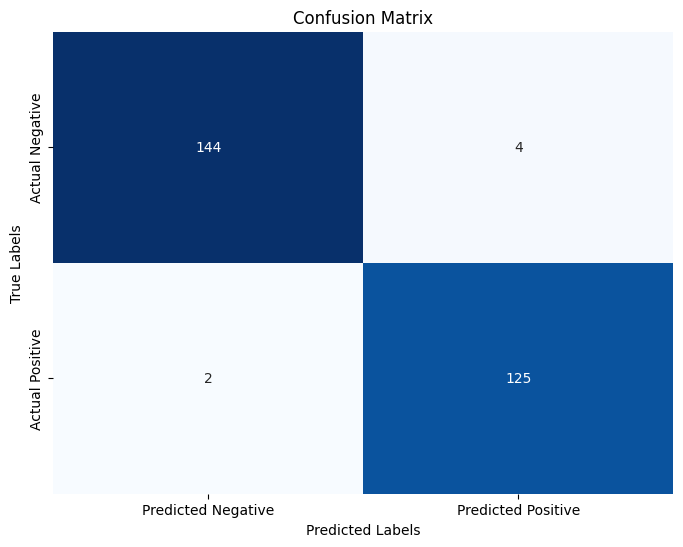

In [97]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#• Explore the impact of regularization (L2 regularization) on your model performance.

Applying the Logistic Regression with L2 Regularization and displaying the confusion matrix

In [98]:
# Initialize the logistic regression model with L2 regularization
model_l2 = LogisticRegression(penalty='l2', C=1.0)  # C is the inverse of regularization strength

# Train the model with L2 regularization
model_l2.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_l2 = model_l2.predict(X_test_scaled)

# Calculate accuracy
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print("Accuracy with L2 Regularization:", accuracy_l2)

# Display confusion matrix
conf_matrix_l2 = confusion_matrix(y_test, y_pred_l2)
print("Confusion Matrix with L2 Regularization:\n", conf_matrix_l2)

# Display classification report
print("Classification Report with L2 Regularization:\n", classification_report(y_test, y_pred_l2))


Accuracy with L2 Regularization: 0.9781818181818182
Confusion Matrix with L2 Regularization:
 [[144   4]
 [  2 125]]
Classification Report with L2 Regularization:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



Displayng the confusion matrix

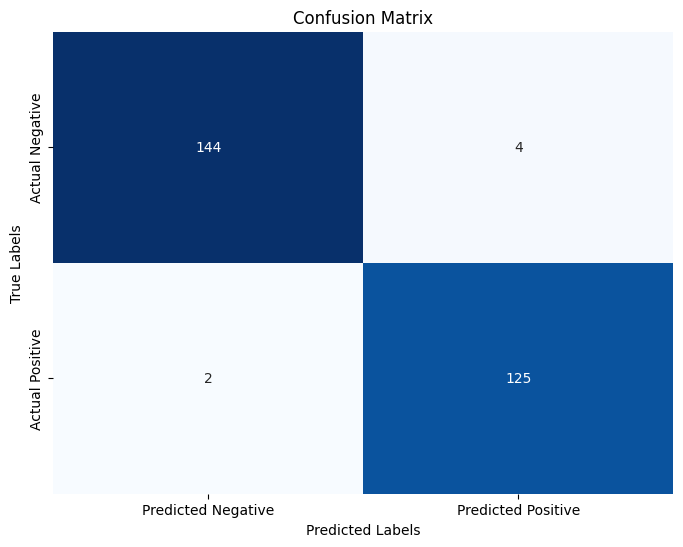

In [99]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_l2, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#Bonus Task: : Can you improve the model's performance by tuning its hyperparameters? Try using GridSearchCV to find the best parameters.


Logistic Regression Model with Hyperparameter Tuning using GridSearchCV

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l1'}
Best Cross-Validation Score: 0.9927065172270652
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



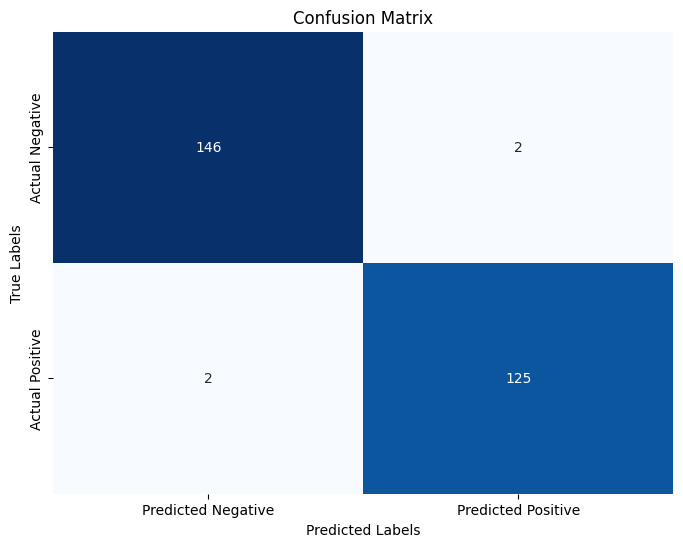

In [101]:
# Set up the Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],        # Regularization type
    'max_iter': [100, 200, 300],    # Maximum number of iterations
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix_parameters = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_parameters, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#Conclusion

In this lab, we successfully implemented and optimized a Logistic Regression model to classify banknotes as genuine or forged using the Banknote Authentication dataset.There is no missing value and all the data is already in int and float datatype.Following preprocessing phase (scaling and standardization) that included feature scaling, the initial model achieved an accuracy of 97.8%.Recognizing the potential for improvement, we applied L2 regulization but found no improvement. In the end we employed GridSearchCV to fine-tune hyperparameters, leading to the discovery of the optimal configuration: C = 100, max_iter = 100, and penalty = L1. This meticulous tuning resulted in a remarkable cross-validation score of 99.27%.

Upon evaluating the refined model, we achieved an accuracy of 99% on the test dataset, with precision and recall scores nearing perfect values for both classes. The confusion matrix confirmed the model's effectiveness, revealing minimal misclassifications. Overall, the project demonstrated that strategic hyperparameter optimization can significantly enhance the performance of predictive models, thereby providing reliable solutions for real-world challenges such as banknote authentication.